In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To handle missing data
import missingno as msno

# Imputations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer, SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/Insurance Premium Prediction Dataset.csv')
data = data.head(50000)

In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Kaggle compets/Insurance Premium Prediction Dataset.csv')
# data = data.head(100000)

In [ ]:
# categorical subdataset
data_categorical = data.select_dtypes(include=['object'])
data_categorical = data_categorical.drop(columns=['Occupation', 'Policy Start Date'])
#numerical subdataset
df_non_object = data.select_dtypes(exclude=['object'])
data_numeric = df_non_object.drop(columns=['Premium Amount', 'Previous Claims'])

#output variable
df_target = data['Premium Amount']

In [ ]:
print(data_categorical.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              50000 non-null  object
 1   Marital Status      49156 non-null  object
 2   Education Level     50000 non-null  object
 3   Location            50000 non-null  object
 4   Policy Type         50000 non-null  object
 5   Customer Feedback   46766 non-null  object
 6   Smoking Status      50000 non-null  object
 7   Exercise Frequency  50000 non-null  object
 8   Property Type       50000 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB
None


In [ ]:
print(data_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   49156 non-null  float64
 1   Annual Income         47460 non-null  float64
 2   Number of Dependents  45051 non-null  float64
 3   Health Score          48133 non-null  float64
 4   Vehicle Age           50000 non-null  int64  
 5   Credit Score          44972 non-null  float64
 6   Insurance Duration    50000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.7 MB
None


In [ ]:
missing_values = data_categorical.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                    Missing Values  Percentage
Gender                           0       0.000
Marital Status                 844       1.688
Education Level                  0       0.000
Location                         0       0.000
Policy Type                      0       0.000
Customer Feedback             3234       6.468
Smoking Status                   0       0.000
Exercise Frequency               0       0.000
Property Type                    0       0.000


In [ ]:
missing_values = data_numeric.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                      Missing Values  Percentage
Age                              844       1.688
Annual Income                   2540       5.080
Number of Dependents            4949       9.898
Health Score                    1867       3.734
Vehicle Age                        0       0.000
Credit Score                    5028      10.056
Insurance Duration                 0       0.000


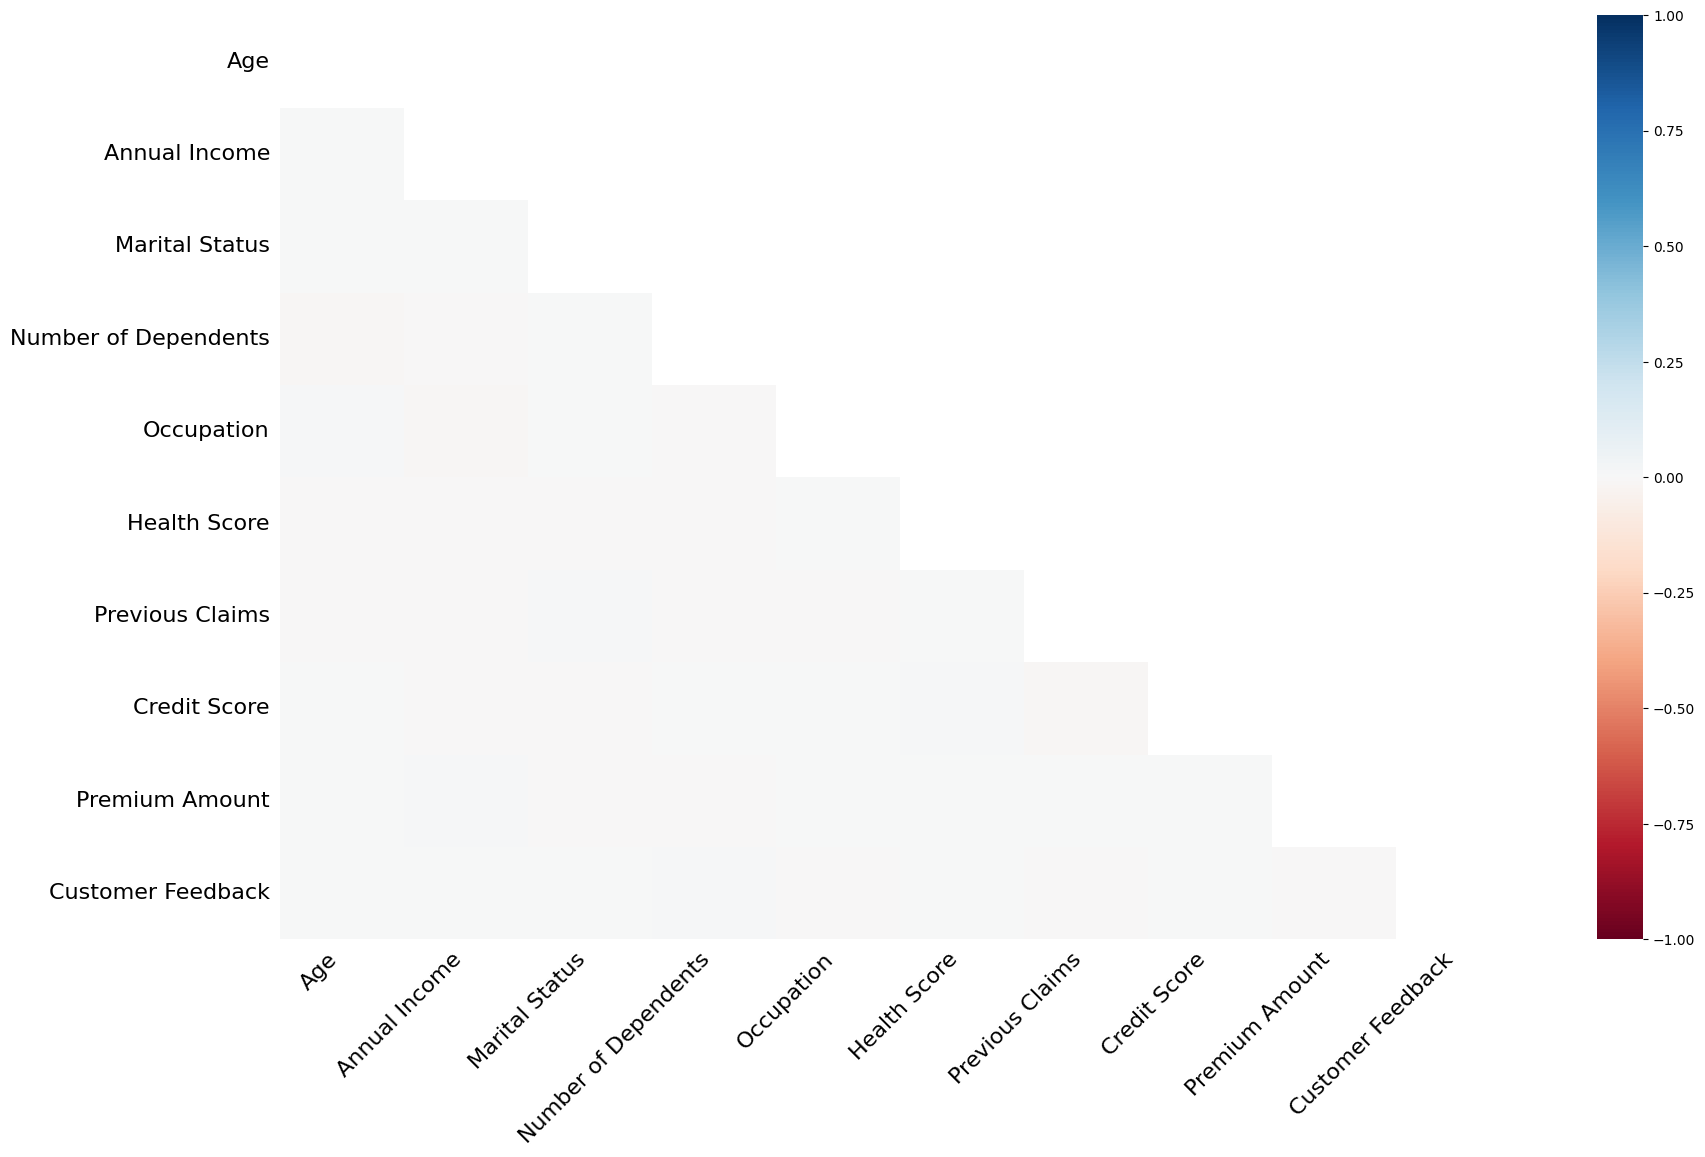

In [ ]:
msno.heatmap(data)
plt.show()

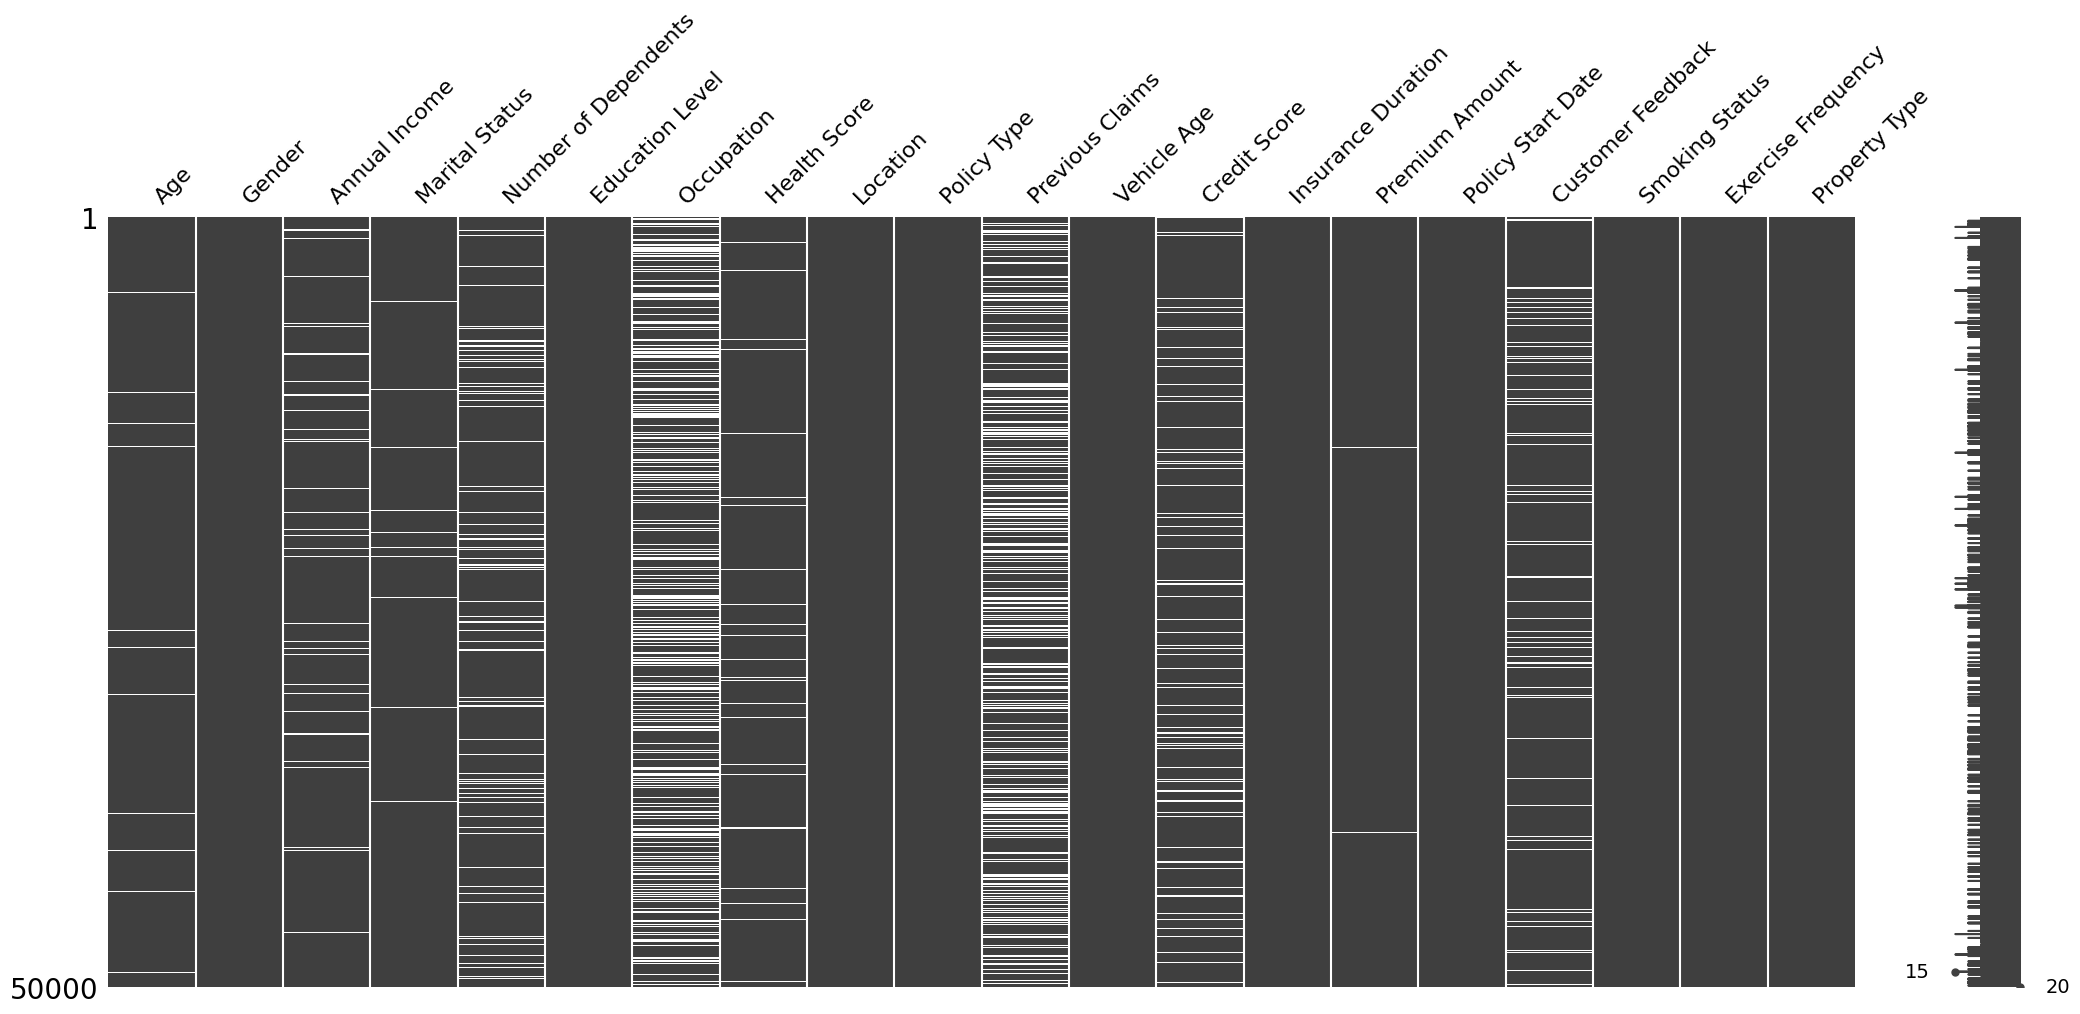

In [ ]:
msno.matrix(data)
plt.show()

In [ ]:
# Step 1: Identify non-missing target values to create a mask
mask = df_target.notna()

# Step 2: Filter and reset index for numeric, categorical, and target data
# based on the mask

data_numeric_cleaned = data_numeric[mask].reset_index(drop=True)
data_categorical_cleaned = data_categorical[mask].reset_index(drop=True)
df_target_cleaned = df_target[mask].reset_index(drop=True)

# Step 3: Impute missing values in numeric data using KNNImputer
# Chosen because correlation between numeric variables is low
knn_imputer = KNNImputer(n_neighbors=2)
data_numeric_cleaned = pd.DataFrame(
    knn_imputer.fit_transform(data_numeric_cleaned),
    columns=data_numeric_cleaned.columns
)

# Step 4: Encode categorical data using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_categorical_encoded = ordinal_encoder.fit_transform(data_categorical_cleaned)
data_categorical_encoded = pd.DataFrame(
    data_categorical_encoded, columns=data_categorical_cleaned.columns
)

# Step 5: Impute missing values in categorical data using IterativeImputer
iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=42)
categorical_imputed_data = iterative_imputer.fit_transform(data_categorical_encoded)
categorical_imputed_data = pd.DataFrame(
    categorical_imputed_data, columns=data_categorical_cleaned.columns
)

# Step 6: Combine the imputed numeric, categorical, and target data into a single dataset
final_data = pd.concat([
    data_numeric_cleaned,
    categorical_imputed_data,
    df_target_cleaned
], axis=1)

# Display the final dataset
final_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration,Gender,Marital Status,Education Level,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,56.0,99990.0,1.0,31.074627,13.0,320.0,5.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,1.0,308.0
1,46.0,2867.0,1.0,50.271335,3.0,694.0,4.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,517.0
2,32.0,30154.0,3.0,14.714909,16.0,652.0,8.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,2.0,849.0
3,60.0,48371.0,0.0,25.346926,11.0,330.0,7.0,0.0,0.0,3.0,0.0,1.0,2.0,0.0,2.0,1.0,927.0
4,25.0,54174.0,0.0,6.659499,9.0,516.5,8.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,303.0


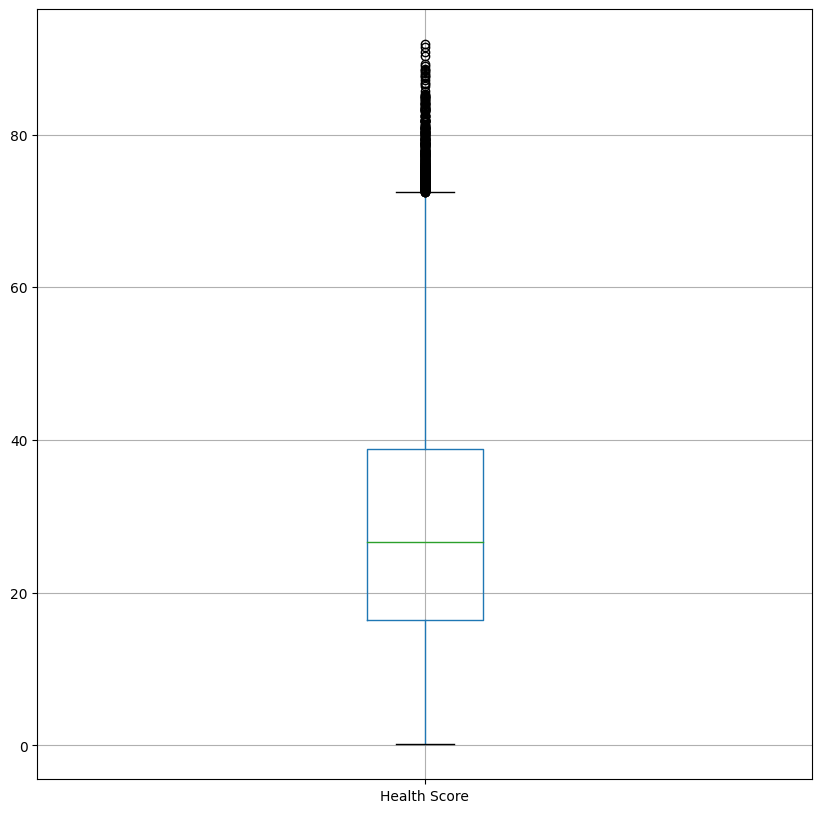

In [ ]:
#plot box plot of data_numeric_cleaned
data_numeric_cleaned[['Health Score']].boxplot(figsize=(10, 10))
plt.show()

In [ ]:
# Handle the skewness ok
# Handle outliers ok
# Proceed in imputiation

In [ ]:
# Extract columns of data_numeric_cleaned and categorical_imputed_data
data_numeric_columns = data_numeric_cleaned.columns
categorical_imputed_columns = categorical_imputed_data.columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_imputed_columns), # sparse=False added
        ('num', StandardScaler(), data_numeric_columns)
    ])

data_transformed = preprocessor.fit_transform(final_data)

# Convertir le résultat en DataFrame pour une meilleure lisibilité
# Pour les colonnes OneHotEncoder, il faut obtenir les noms après transformation
ohe_columns = preprocessor.transformers_[0][1].get_feature_names_out(categorical_imputed_columns)
# Convert data_numeric_columns to a list to ensure compatibility during concatenation
columns = list(ohe_columns) + list(data_numeric_columns)

data_transformed_df = pd.DataFrame(data_transformed, columns=columns)

data_transformed_df

,Gender_1.0,Marital Status_0.021111111111111112,Marital Status_0.20378607503607502,Marital Status_0.20536652236652234,Marital Status_0.26278679653679654,Marital Status_0.266829365079365,Marital Status_0.2696854006638411,Marital Status_0.27385317460317454,Marital Status_0.30481290475949907,Marital Status_0.3125238095238094,...,Exercise Frequency_3.0,Property Type_1.0,Property Type_2.0,Age,Annual Income,Number of Dependents,Health Score,Vehicle Age,Credit Score,Insurance Duration
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.113919,1.657721,-0.718651,0.153063,0.600427,-1.635490,-0.002888
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.371968,-1.116790,-0.718651,1.372275,-1.131215,0.773961,-0.389665
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.666764,-0.337283,0.729156,-0.885967,1.119919,0.503381,1.157444
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.410699,0.183122,-1.442555,-0.210711,0.254098,-1.571066,0.770667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.186129,0.348896,-1.442555,-1.397578,-0.092230,-0.369562,1.157444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.410699,-0.757246,0.005252,0.448387,-1.131215,1.501949,0.770667
49681,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.371968,2.943692,0.005252,-0.228313,0.600427,0.696652,-1.549998
49682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.631300,-0.553021,-1.080603,-1.179901,0.946755,0.316552,1.544221
49683,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.149383,-0.989667,0.729156,1.998250,-0.611722,-0.334129,1.544221


In [51]:
#@title Handling skewness for numerical data


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Transformation: Log
Shapiro-Wilk p-value: 0.0000


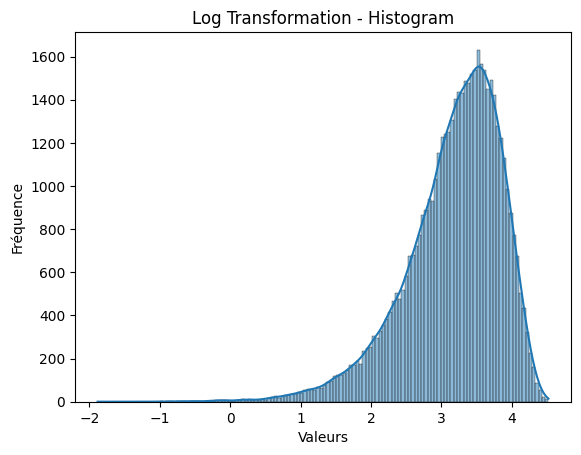

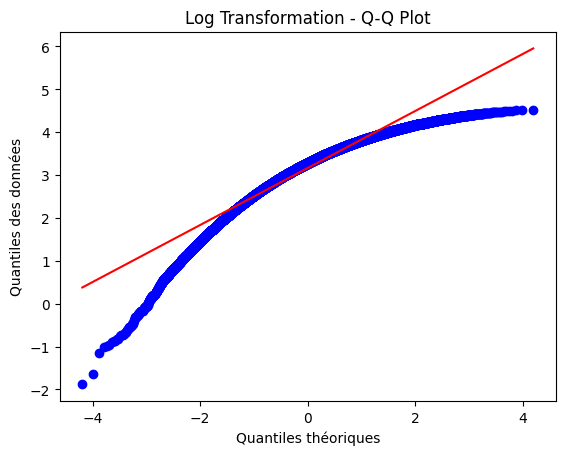



Transformation: Square Root
Shapiro-Wilk p-value: 0.0000


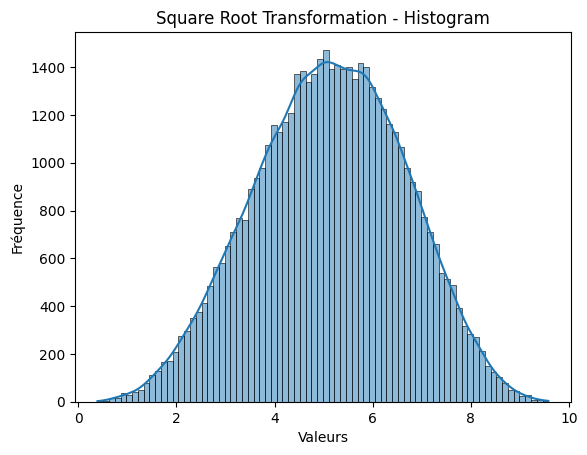

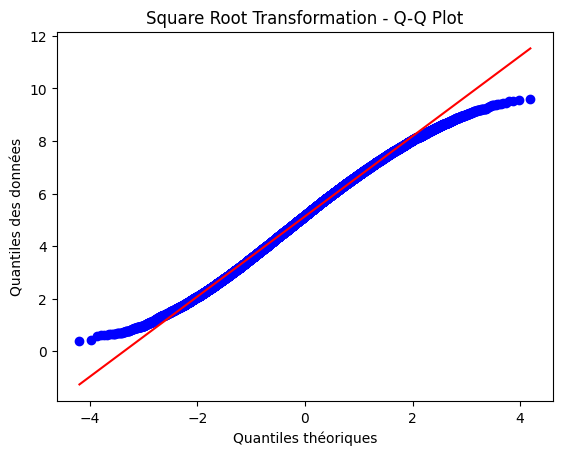



Transformation: Inverse
Shapiro-Wilk p-value: 0.0000


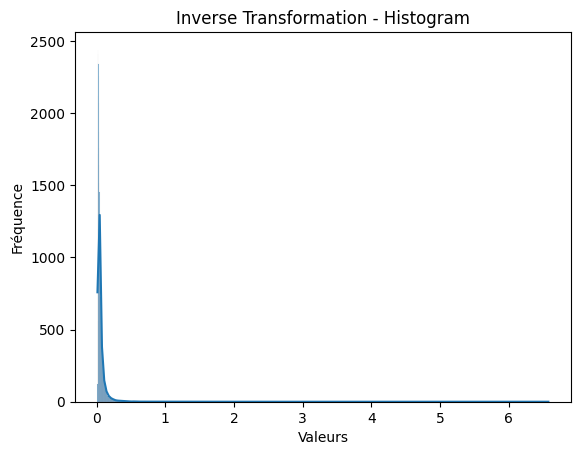

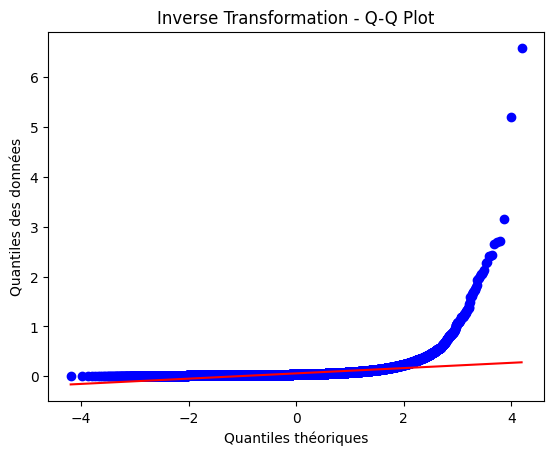



Transformation: Box-Cox
Shapiro-Wilk p-value: 0.0000


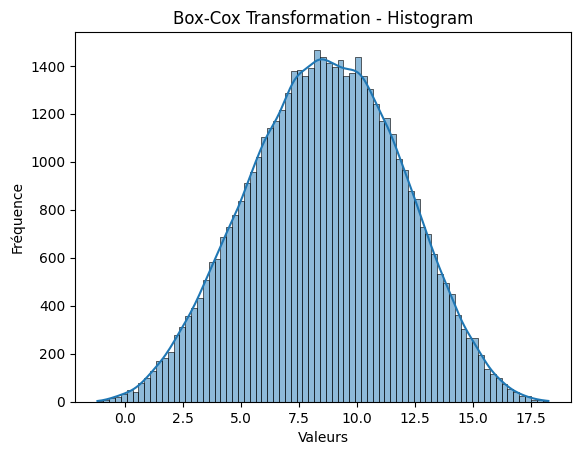

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [56]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Génération de données synthétiques avec une asymétrie positive
np.random.seed(0)
data = data_numeric_cleaned['Health Score']

# Fonction pour appliquer les transformations, tester la normalité et tracer les graphiques Q-Q
def transform_test_and_plot(data):
    transformations = {
        'Log': np.log,
        'Square Root': np.sqrt,
        'Inverse': lambda x: 1 / x,
        'Box-Cox': lambda x: stats.boxcox(x)[0],
        'Yeo-Johnson': lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x.reshape(-1, 1)).flatten(),
        'Quantile': lambda x: QuantileTransformer(output_distribution='normal').fit_transform(x.reshape(-1, 1)).flatten()
    }

    results = {}

    for name, func in transformations.items():
        try:
            # Vérification des valeurs positives pour les transformations qui l'exigent
            if name in ['Log', 'Box-Cox', 'Inverse'] and np.any(data <= 0):
                transformed_data = np.nan  # Transformation non applicable
                p_value = np.nan
            else:
                transformed_data = func(data)
                # Convert transformed_data to a 1D array before Shapiro-Wilk test
                stat, p_value = stats.shapiro(np.ravel(transformed_data))

            results[name] = {
                'Transformed Data': transformed_data,
                'Shapiro-Wilk p-value': p_value
            }
        except Exception as e:
            results[name] = {
                'Transformed Data': None,
                'Shapiro-Wilk p-value': None,
                'Error': str(e)
            }

    return results

# Application des transformations, tests et tracés
results = transform_test_and_plot(data)

# Affichage des résultats
for name, result in results.items():
    print(f"Transformation: {name}")
    if result['Transformed Data'] is not None:
        print(f"Shapiro-Wilk p-value: {result['Shapiro-Wilk p-value']:.4f}")

        # Histogramme avec estimation de la densité
        sns.histplot(result['Transformed Data'], kde=True)
        plt.title(f'{name} Transformation - Histogram')
        plt.xlabel('Valeurs')
        plt.ylabel('Fréquence')
        plt.show()

        # Q-Q Plot
        # Extract the values from the 'Transformed Data' using .values and then flatten it
        stats.probplot(np.ravel(result['Transformed Data'].values), dist="norm", plot=plt)
        plt.title(f'{name} Transformation - Q-Q Plot')
        plt.xlabel('Quantiles théoriques')
        plt.ylabel('Quantiles des données')
        plt.show()
    else:
        print(f"Transformation non applicable ou erreur: {result.get('Error', 'N/A')}")
    print("\n")

In [ ]:
missing_values = data_combined.isnull().sum()
missing_percent = (missing_values / len(data_combined)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

In [ ]:
#@title The target is Premium Amount the rest is feature matrix
target = data_combined['Premium Amount']
feature_matrix = data_combined.drop(columns=['Premium Amount'])

In [ ]:
#@title now create the train test and validation dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values